## Ace079bct024 (Biraj Shrestha)
# Lab 1
# Logistic Regression for Heart Disease Prediction

## THEORY:
Artificial Intelligence (AI): The broad field of computer science focused on building systems that can perform tasks that typically require human intelligence, such as reasoning, problem-solving, perception, and language understanding.

Machine Learning (ML): A subset of AI that involves algorithms which learn patterns from data and improve their performance over time without being explicitly programmed for every task.

Deep Learning (DL): A specialized subset of ML that uses multi-layered neural networks (deep neural networks) to automatically learn complex patterns from large amounts of data.

Data Science: An interdisciplinary field that uses statistics, machine learning, data analysis, and domain knowledge to extract meaningful insights and support decision-making from structured and unstructured data.




# 1. Data Retrieval and Collection

In [95]:
import pandas as pd
# Load dataset
df = pd.read_csv("Heart_Disease.csv")
# Display basic information
df.shape, df.columns


((270, 14),
 Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
        'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
        'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
       dtype='str'))

In [96]:
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# 2.Data Cleaning

In [97]:
# Check missing values
df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [98]:
# Remove rows with missing or invalid cholesterol values
df = df[df['Cholesterol'] > 0]
# Ensure target is binary
df['Heart Disease'].value_counts()


Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [99]:
df.dtypes


Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                  str
dtype: object

# 3. Feature Design

In [100]:
X = df[['Cholesterol']]
y = df['Heart Disease']


# 4. Algorithm Section 
Logistic Regression 
    -Designed for binary outcomes 
    -Outputs probabilities between 0 and 1 
    -Simple and interpretable 

# 5. Loss Function Section
Binary Cross-Entropy (og Loss)
     L =-[ylog(p)+(1-y)log(1-p)]
  -pentalizes incorrect confident predictions
  -Standard loss for logistic regression

# 6. Model Training

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train-test split
model_single = LogisticRegression()
model_single.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# 7. Model Evaluation

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model_single.predict(X_test)

accuracy_score(y_test, y_pred)


0.6111111111111112

In [103]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Absence       0.64      0.85      0.73        33
    Presence       0.50      0.24      0.32        21

    accuracy                           0.61        54
   macro avg       0.57      0.54      0.52        54
weighted avg       0.58      0.61      0.57        54



In [104]:
confusion_matrix(y_test, y_pred)


array([[28,  5],
       [16,  5]])

### Sigmoid Curve

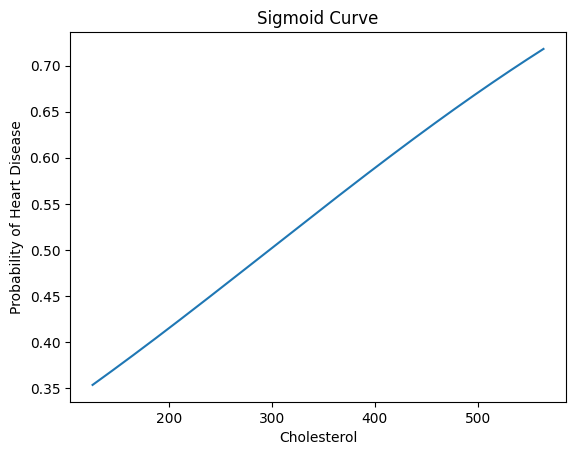

In [105]:
X_range = np.linspace(X['Cholesterol'].min(), 
                      X['Cholesterol'].max(), 
                      300)

X_range_df = pd.DataFrame(X_range, columns=['Cholesterol'])

y_prob = model_single.predict_proba(X_range_df)[:, 1]

plt.plot(X_range, y_prob)
plt.xlabel("Cholesterol")
plt.ylabel("Probability of Heart Disease")
plt.title("Sigmoid Curve")
plt.show()


# Task 2
# Data Cleaning

In [106]:
# Drop missing values
df_clean = df.dropna()

# Feature Design (Multiple Features)

In [107]:
X_multi = df.drop("Heart Disease", axis=1)
y_multi = df["Heart Disease"]

X_multi = pd.get_dummies(X_multi, drop_first=True)


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)


# Model Training

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42
)

model_multi = LogisticRegression(max_iter=1000)
model_multi.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Model Evaluation

In [110]:
y_pred_multi = model_multi.predict(X_test)

accuracy_score(y_test, y_pred_multi)


0.9074074074074074

In [111]:
print(classification_report(y_test, y_pred_multi))


              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [112]:
confusion_matrix(y_test, y_pred_multi)


array([[31,  2],
       [ 3, 18]])

## Model Comparison

- Single feature model has lower accuracy and recall
- Multi-feature model performs better
- Adding features improves prediction but reduces interpretability


## Discussion and Conclusion

In this notebook report, logistic regression was applied to predict the presence of heart disease using both a single feature and multiple features. The single-feature model using cholesterol provided limited predictive performance, indicating that cholesterol alone is insufficient to accurately identify heart disease cases. In contrast, the multi-feature logistic regression model showed improved accuracy, precision, and recall by incorporating multiple medical attributes. This highlights the importance of considering multiple risk factors in medical diagnosis. The results also demonstrate the trade-off between model simplicity and predictive performance.

This report demonstrated the complete machine learning pipeline using logistic regression for heart disease prediction. Logistic regression proved to be an effective and interpretable model for binary classification. While the single-feature model offered simplicity, the multi-feature model achieved better performance and clinical relevance. Overall, the study confirms that using multiple health indicators improves prediction accuracy, making logistic regression a suitable baseline model for medical decision support systems.